<a href="https://colab.research.google.com/github/DmitriiDenisov/research_oversampling/blob/master/Research_gamma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1.
- One random point
- 2D plane

In [0]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Generates random point in rectangle [xy_min; xy_max]
def generate_random_point(n=2, xy_min=[0, 0], xy_max=[10, 20]):
    data = np.random.uniform(low=xy_min, high=xy_max, size=(n,2))
    return data

# Returns directional vector
def get_vector_two_points(two_points):
    return two_points[1] - two_points[0]

In [23]:
# Generate two Random point2:
two_points = generate_random_point(n=2, xy_min=[0, 0], xy_max=[10, 20])
print(two_points)
# get vector for these two points
v = get_vector_two_points(two_points)
print(v)

[[7.7103088  6.1999734 ]
 [3.01496108 0.16487609]]
[-4.69534773 -6.03509731]


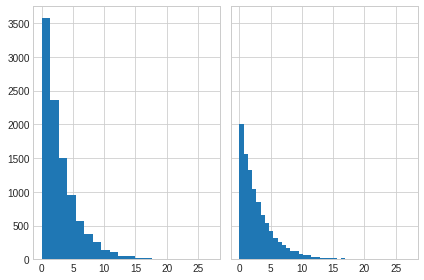

In [24]:
# JUST CHECKING how Gamma dist is look like

N_points = 100000
n_bins = 20

shape, scale = 1., 3.  # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 10000)


fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(s, bins=n_bins)
axs[1].hist(s, bins=2*n_bins)
plt.show()

In [0]:
# Generates normilized Gamma distributed value
def generate_gamma():
    shape, scale = 1., 3.
    s = np.random.gamma(shape, scale, 1)[0]
    if (s > 20): # заглушка пока что
        s = 20
    s = s / 20
    return s

In [0]:
gamma_coeff = generate_gamma()

In [0]:
# Generates new point on line between two initial points
def generate_new_point(start_point, v, gamma_coeff):
    return start_point + v * gamma_coeff

In [0]:
generated_point = generate_new_point(two_points[0], v, gamma_coeff)

In [29]:
# For visualazion:
initial_points_and_generated = np.concatenate((two_points, generated_point[np.newaxis, :]), axis=0)
initial_points_and_generated

array([[7.7103088 , 6.1999734 ],
       [3.01496108, 0.16487609],
       [5.47911494, 3.33214062]])

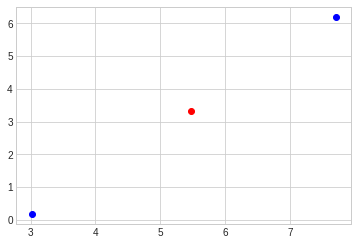

In [30]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np


initial_x, initial_y = map(list, zip(*two_points))
generated_x, generated_y = map(list, zip(*generated_point[np.newaxis, :]))

plt.plot(initial_x, initial_y, 'o', color='blue');
plt.plot(generated_x, generated_y, 'o', color='red');

## 2.
- Multiple Random points
- 2D plane

In [0]:
NUM_RAND_POINTS = 20

In [32]:
# Generate two Random point2:
two_points = generate_random_point(n=2, xy_min=[0, 0], xy_max=[10, 20])
print(two_points)
# get vector for these two points
v = get_vector_two_points(two_points)
print(v)

[[ 9.07909689 16.92525633]
 [ 6.70581849  6.71907998]]
[ -2.3732784  -10.20617635]


In [0]:
gamma_coeff = generate_gamma()

generated_points = generate_new_point(two_points[0], v, gamma_coeff)[np.newaxis, :]

for i in range(NUM_RAND_POINTS - 1):
    gamma_coeff = generate_gamma()
    generated_points = np.concatenate((generate_new_point(two_points[0], v, gamma_coeff)[np.newaxis, :], generated_points),
                                      axis=0)

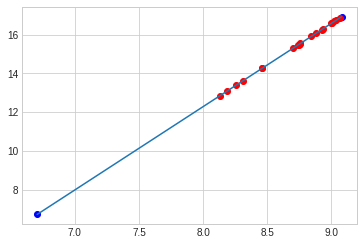

In [34]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np


initial_x, initial_y = map(list, zip(*two_points))
generated_x, generated_y = map(list, zip(*generated_points))

plt.plot(initial_x, initial_y, 'o', color='blue');
plt.plot(generated_x, generated_y, 'o', color='red');
plt.plot(initial_x, initial_y, '-');

In [35]:
generated_points

array([[ 8.45791386, 14.2538868 ],
       [ 8.46264952, 14.27425232],
       [ 8.73631322, 15.45113064],
       [ 8.92290276, 16.25355052],
       [ 8.18742356, 13.09065551],
       [ 8.31283578, 13.6299851 ],
       [ 9.02249173, 16.6818284 ],
       [ 9.06536996, 16.86622427],
       [ 8.70251425, 15.30577971],
       [ 9.00532328, 16.60799624],
       [ 8.84359255, 15.91248057],
       [ 8.75802346, 15.54449454],
       [ 8.88327119, 16.08311674],
       [ 8.25769952, 13.39287409],
       [ 8.75543201, 15.53335015],
       [ 8.12771835, 12.83389595],
       [ 8.7439709 , 15.48406217],
       [ 8.99834466, 16.577985  ],
       [ 9.03958422, 16.75533389],
       [ 8.93245892, 16.29464638]])

In [36]:
two_points

array([[ 9.07909689, 16.92525633],
       [ 6.70581849,  6.71907998]])

## 3.
- One Random point
- n dimentional space

In [0]:
# Generates n random points in hypercube [xy_min; xy_max]
def generate_random_point_nd(num_points=2, n=10, min_=0, max_=10):
    xy_min = [min_] * n
    xy_max = [max_] * n
    data = np.random.uniform(low=xy_min, high=xy_max, size=(num_points, n))
    return data

In [39]:
two_points_nd = generate_random_point_nd(num_points=2, n=10)
assert two_points_nd.shape[0] == 2
assert two_points_nd.shape[1] == 10
print(two_points_nd)
# get vector for these two points
v = get_vector_two_points(two_points_nd)
print(v)

[[8.09544462 8.32252234 7.45958673 2.14449929 4.97762382 9.68754017
  2.46276072 1.83199276 6.64224111 4.20166921]
 [7.79606844 3.93576844 4.87287582 3.30078627 1.52209141 0.06155324
  6.58206942 2.64991636 6.61080676 1.63631653]]
[-0.29937617 -4.3867539  -2.58671091  1.15628698 -3.45553241 -9.62598693
  4.1193087   0.8179236  -0.03143434 -2.56535268]


In [0]:
gamma_coeff = generate_gamma()

In [41]:
generated_point = generate_new_point(two_points_nd[0], v, gamma_coeff)
generated_point

array([8.09469013, 8.31146681, 7.45306768, 2.14741337, 4.96891516,
       9.66328068, 2.47314223, 1.8340541 , 6.64216188, 4.19520399])

In [0]:
def test_points_on_line(p1, p2, list_p3, tol=0.0001):
    # Consider that point in n-d is (vec)x = (vec)x_0 + (vec)k * (vec) t
    # Suppose that (vec)x_0 is p1
    if len(list_p3.shape) == 1:
        list_p3 = list_p3[np.newaxis, :]
    k_vec = p2 - p1
    for p3 in list_p3:
        vec_t = (p3 - p1) / k_vec 
        if  not all(abs(temp - vec_t[0]) < tol for temp in vec_t):
            return False
    return True

In [0]:
# Testing
assert test_points_on_line(two_points_nd[0], two_points_nd[1], generated_point)

## 4.
- Multiple Random points
- n dimentional space

In [0]:
NUM_RAND_POINTS = 20
N_FEATURES = 10

In [45]:
two_points_nd = generate_random_point_nd(num_points=2, n=N_FEATURES)
assert two_points_nd.shape[0] == 2
assert two_points_nd.shape[1] == N_FEATURES
print(two_points_nd)
# get vector for these two points
v = get_vector_two_points(two_points_nd)
print(v)

[[1.98904519 4.2267795  2.04465943 4.35101966 9.2437722  6.80715592
  8.15663401 4.37303943 3.62433726 8.21018941]
 [7.01769275 9.75146966 7.08441877 8.90843862 7.88717634 6.19005881
  3.56134984 9.13645092 6.06902394 1.96247746]]
[ 5.02864755  5.52469016  5.03975935  4.55741896 -1.35659586 -0.61709712
 -4.59528417  4.7634115   2.44468667 -6.24771196]


In [0]:
gamma_coeff = generate_gamma()

generated_points = generate_new_point(two_points_nd[0], v, gamma_coeff)[np.newaxis, :]

for i in range(NUM_RAND_POINTS - 1):
    gamma_coeff = generate_gamma()
    generated_points = np.concatenate((generate_new_point(two_points_nd[0], v, gamma_coeff)[np.newaxis, :], generated_points),
                                      axis=0)
    
assert generated_points.shape[0] == NUM_RAND_POINTS
assert generated_points.shape[1] == N_FEATURES

In [0]:
assert test_points_on_line(two_points_nd[0], two_points_nd[1], generated_points)